In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Pré-processamento

In [4]:
def converte_classe(rotulo):
    return 1 if rotulo == ' >50K' else 0

In [5]:
df['income'] = df['income'].apply(converte_classe)
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
X = df.drop('income', axis=1)
y = df.income

In [7]:
X.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

### Definindo idade como categ.

In [9]:
import tensorflow as tf
%matplotlib inline

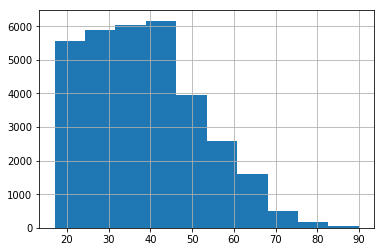

In [10]:
df.age.hist()

In [11]:
idade = tf.feature_column.numeric_column('age')

In [12]:
# cria os range de idades
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries=list(range(20,100,10)))]

In [13]:
print(idade_categorica)

[_BucketizedColumn(source_column=_NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


### Separando categóricos e númericos

In [14]:
nome_colunas_categoricas = [c for c, t in list(zip(X.columns, X.dtypes)) if t == object]
nome_colunas_categoricas

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [15]:
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key=c, vocabulary_list=X[c].unique()) 
                       for c in nome_colunas_categoricas]

In [16]:
print(colunas_categoricas[2])

_VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [17]:
nome_colunas_numericas = [c for c, t in list(zip(X.columns, X.dtypes)) if t != object]
nome_colunas_numericas.pop(0) # age
nome_colunas_numericas

['final-weight',
 'education-num',
 'capital-gain',
 'capital-loos',
 'hour-per-week']

In [18]:
colunas_numericas = [tf.feature_column.categorical_column_with_vocabulary_list(key=c, vocabulary_list=X[c].unique()) 
                       for c in nome_colunas_numericas]

In [19]:
colunas_numericas[1]

_VocabularyListCategoricalColumn(key='education-num', vocabulary_list=(13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6, 2, 1, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)

In [20]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

### Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=.3)

## Treinamento

In [23]:
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(
    x=X_treinamento,
    y=y_treinamento,
    batch_size=32,
    num_epochs=None,
    shuffle=True
)

In [24]:
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2c7bd9q5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7faef05e02e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
classificador.train(input_fn=funcao_treinamento, steps=10000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp2c7bd9q5/model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 221.284
INFO:tensorflow:loss = 8.9075985, step = 101 (0.453 sec)
INFO:tensorflow:global_step/sec: 593.176
INFO:tensorflow:loss = 15.284919, step = 201 (0.169 sec)
INFO:tensorflow:global_step/sec: 573.252
INFO:tensorflow:loss = 9.293576, step = 301 (0.175 sec)
INFO:tensorflow:global_step/sec: 541.803
INFO:tensorflow:loss = 7.6156983, step = 401 (0.184 sec)
INFO:t

INFO:tensorflow:loss = 5.770156, step = 7001 (0.173 sec)
INFO:tensorflow:global_step/sec: 572.32
INFO:tensorflow:loss = 5.5984664, step = 7101 (0.175 sec)
INFO:tensorflow:global_step/sec: 578.903
INFO:tensorflow:loss = 8.23958, step = 7201 (0.173 sec)
INFO:tensorflow:global_step/sec: 578
INFO:tensorflow:loss = 4.3552046, step = 7301 (0.173 sec)
INFO:tensorflow:global_step/sec: 571.464
INFO:tensorflow:loss = 9.180323, step = 7401 (0.175 sec)
INFO:tensorflow:global_step/sec: 583.09
INFO:tensorflow:loss = 7.6732717, step = 7501 (0.171 sec)
INFO:tensorflow:global_step/sec: 581.433
INFO:tensorflow:loss = 5.8442316, step = 7601 (0.172 sec)
INFO:tensorflow:global_step/sec: 574.222
INFO:tensorflow:loss = 3.7802906, step = 7701 (0.175 sec)
INFO:tensorflow:global_step/sec: 578.919
INFO:tensorflow:loss = 4.4167976, step = 7801 (0.172 sec)
INFO:tensorflow:global_step/sec: 582.598
INFO:tensorflow:loss = 6.529108, step = 7901 (0.172 sec)
INFO:tensorflow:global_step/sec: 577.267
INFO:tensorflow:loss 

## Previsões

In [26]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(
    x=X_teste,
    batch_size=32,
    shuffle=False
)

In [27]:
previsoes = classificador.predict(input_fn=funcao_previsao)

In [28]:
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2c7bd9q5/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1.8956565], dtype=float32),
  'logistic': array([0.13060087], dtype=float32),
  'probabilities': array([0.86939913, 0.13060087], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-4.737176], dtype=float32),
  'logistic': array([0.00868723], dtype=float32),
  'probabilities': array([0.9913128 , 0.00868723], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.01390341], dtype=float32),
  'logistic': array([0.5034758], dtype=float32),
  'probabilities': array([0.4965242, 0.5034758], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([1.9460884], dtype=float32),
  'logistic': array([0.8750195], dtype=float32),
  'probabilities': array([0.12498051, 0.8750195 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-4.043599], dtype=float32),
  'logistic': array

In [29]:
previsoes_final = [p['class_ids'] for p in classificador.predict(input_fn=funcao_previsao)]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2c7bd9q5/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [31]:
previsoes_final[:5]

[array([0]), array([0]), array([1]), array([1]), array([0])]

## Métricas

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
taxa_acerto = accuracy_score(y_teste, previsoes_final)
taxa_acerto

0.8652881564131436